## Capstone Project Stage 1: Exploratory Data Analysis

This will involve some simple  statistics, smoothing, and basic image analysis.

In [59]:
%cd /content/drive/MyDrive/FINAL_CAPSTONE


/content/drive/MyDrive/FINAL_CAPSTONE


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
#installing opencv for python

!pip install opencv-contrib-python


## Step1: Understanding the Problem Statement from dataset source
1. This dataset consists of collection of
speed sign images for 8 different speeds.
2. The colour Images corresponding to each sport category are  of size 224x224x3 PNG format.
3. Data is separated into train and  test directories.
4. Additionallly there are csv files  included for those that wish to use it to create there own train, test and validation datasets.
5. This dataset can be used for developed an automatic (computer based) traffic sign classifier from images.

## Step2: Analyzing the Dataframes:
### Train data

In [20]:
#train dataset exploration
import pandas as pd
data_dir = '/content/drive/MyDrive/FINAL_CAPSTONE'
Image_Data_Path = data_dir + '/TRAIN_DATA/'
names = ['ID', 'class id', 'filepaths', 'labels', 'data set']
train_df = pd.read_csv(data_dir + '/TRAIN_DATA/train_labels.csv')

In [27]:
train_df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [16]:
train_df.tail()

,ClassId,Name
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  8 non-null      int64 
 1   Name     8 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


### Test Data

In [54]:
#Test Dataset Exploration

In [45]:
Image_Data_Path = data_dir + '/TEST_DATA/'
test_df = pd.read_csv(data_dir + '/TEST_DATA/test_labels.csv')
test_df.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ClassId  8 non-null      int64 
 1   Name     8 non-null      object
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


# Observations


1. The dataset is divided into a subset of  34,250 train images and 14493 test images.
2. The train and test subsets have image location shown as the filepath column/attribute in the dataset
3. There are 4 columns in total. class_id, filepath, class labels and valid status of the dataset.  


## Step3: Exploring Data Columns in dataset
### Label Group

In [2]:
labels_df = train_df[['classId', 'labels']].groupby(['labels']).count().reset_index()
labels_df.columns = ['classId']
labels_df =labels_df.sort_values(by =['count'],ascending = False)
print(labels_df)


NameError: ignored

In [22]:
print('Number of unique labels: ', labels_df.shape[0])

NameError: ignored

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=labels_df['class id'][:100], y =labels_df['count'][:100] )
plt.title("Number of images in the same label for each label/class")

NameError: ignored

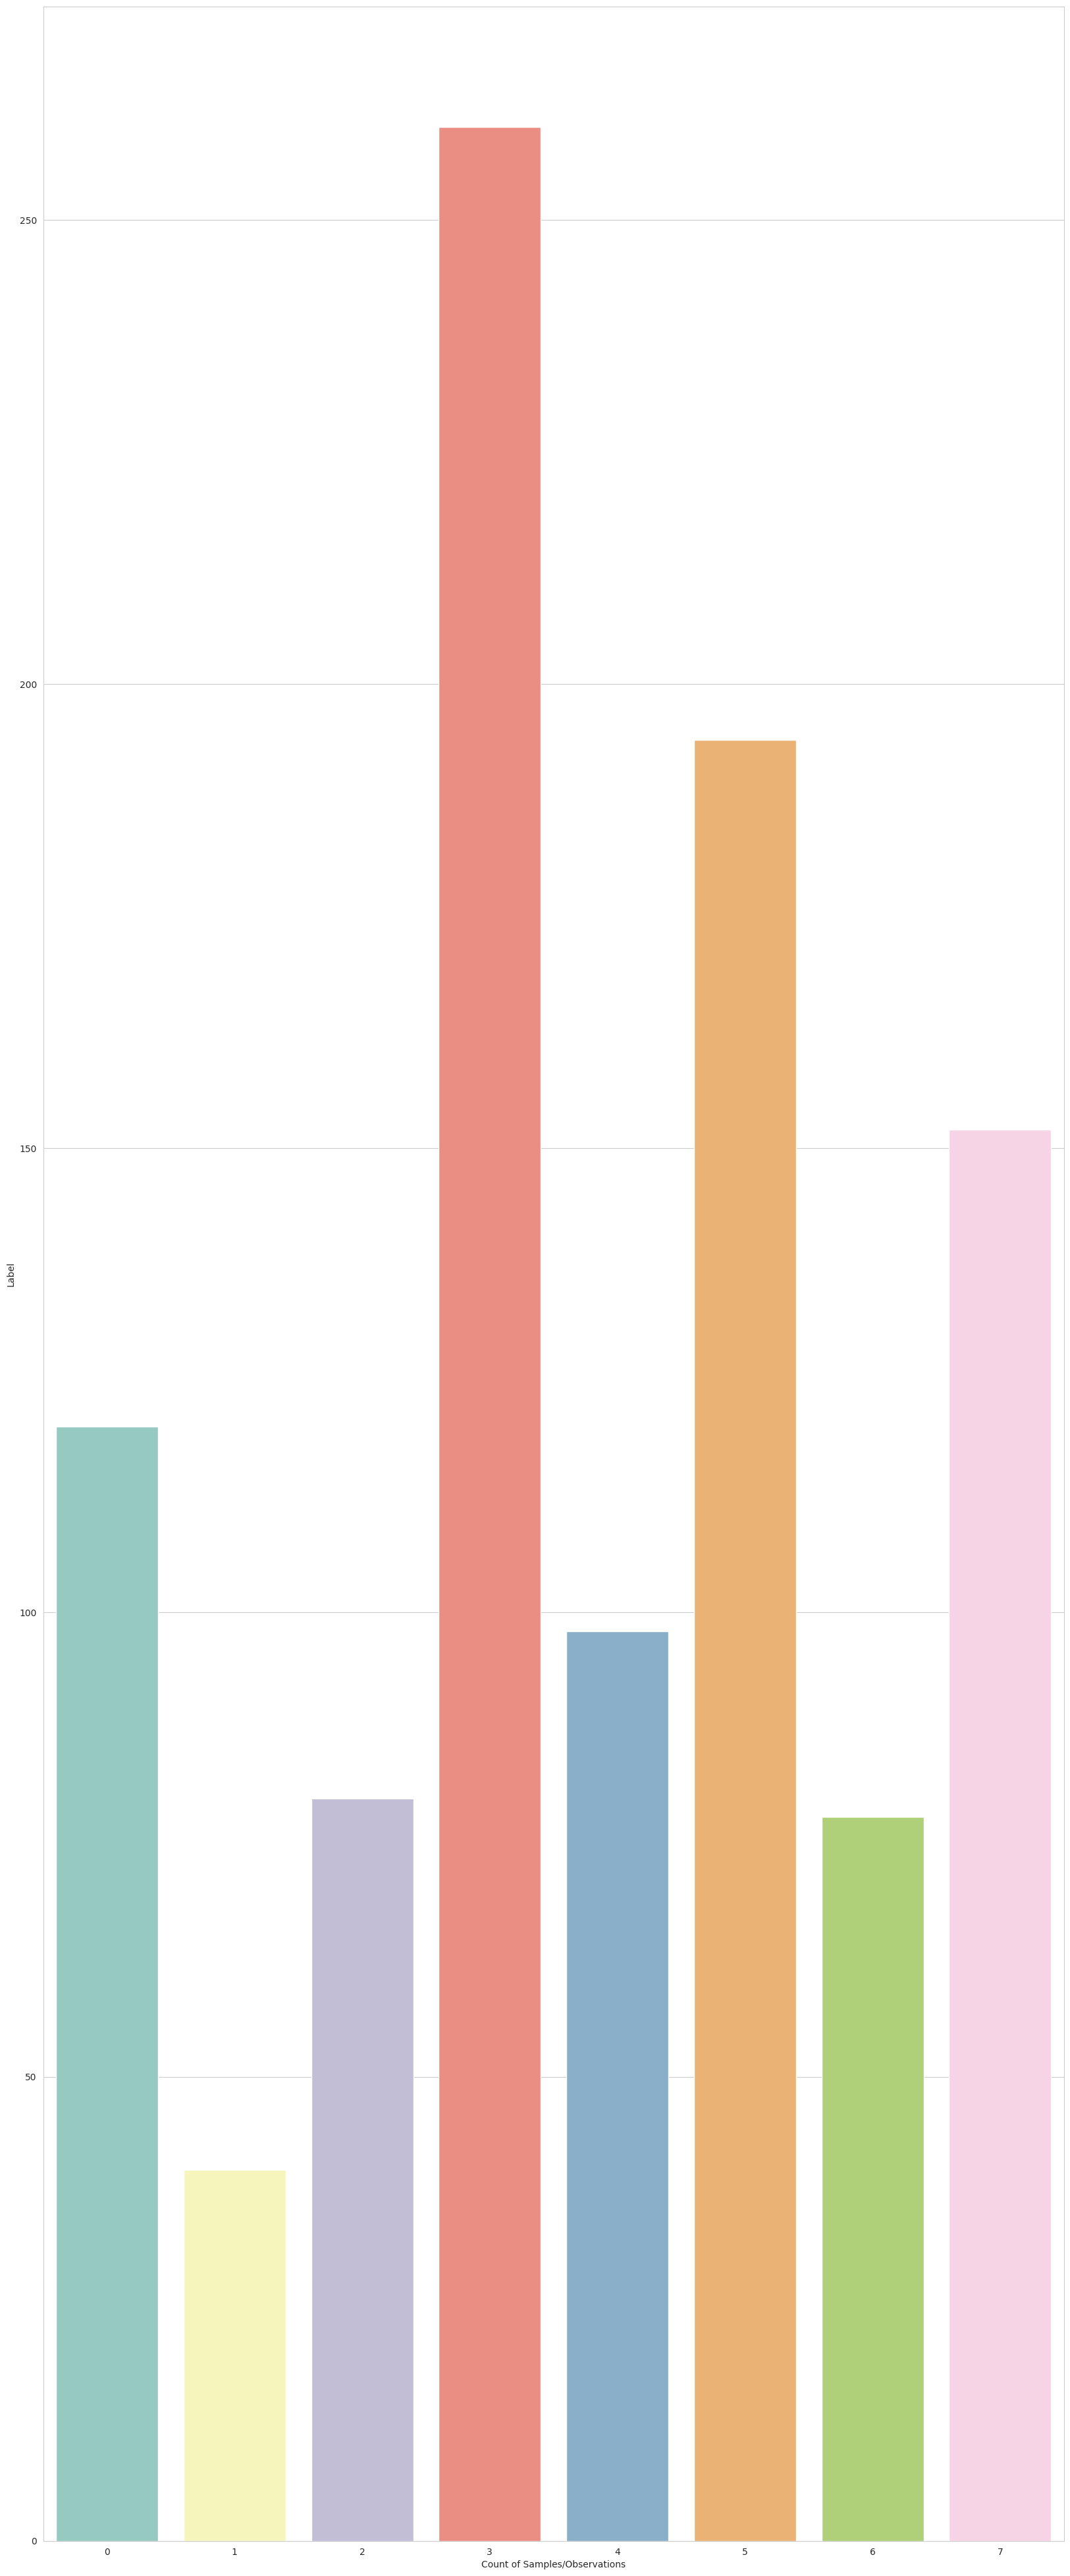

In [42]:
import pandas as pd
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
d = dict()
for i in range(0,8):
  d[i] = len(os.listdir ('/content/drive/MyDrive/FINAL_CAPSTONE/TRAIN_DATA/' + str(i)))
plt.figure(figsize = (20, 50))
sns.barplot(x = list(d.keys()), y = list(d.values()), palette = 'Set3')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations');

##Observations


1.   From the above information, we can see that the images in train subset belong to 8 traffic sign categories(class labels).
2. Class label 3 has highest number of images (260 images) for  "40" speed sign.
3. Class label 1  has least number of images (49 images) for sky "15" speed sign.

4. This problem can be solved as a classification problem to automatically classify sport images into 8 different classes.

5. In the first stage of my study for this capstone project, I will investigate a two-class image classification problem using the first classes in the dataset: "5" speed sign   vs. "15" speed sign.


### Analysing images for two class image classification problem

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

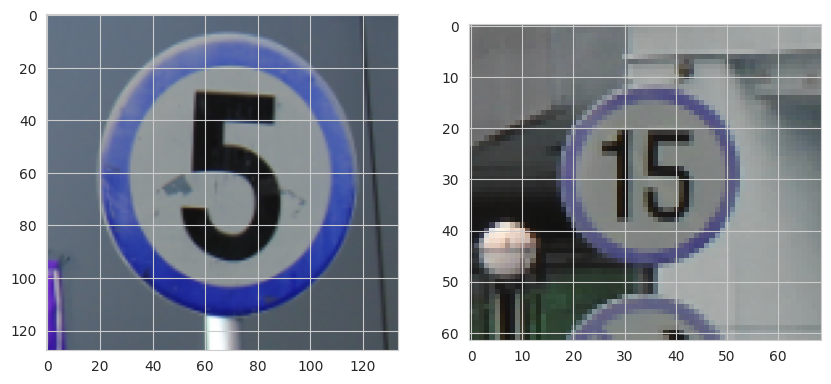

In [30]:
#Read and Display Images

img_path_1 = '/content/drive/MyDrive/FINAL_CAPSTONE/TRAIN_DATA/0/000_0001.png'
img_1 = cv2.imread(img_path_1)
img_path_2 = '/content/drive/MyDrive/FINAL_CAPSTONE/TRAIN_DATA/1/001_0001.png'
img_2 = cv2.imread(img_path_2)
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(img_1)
plt.subplot(122)
plt.imshow(img_2);

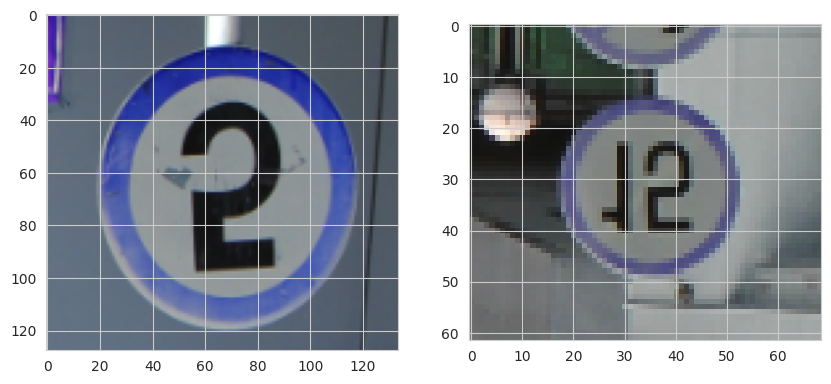

In [31]:
#Basic image manipulation (rotating/flipping)
flip_img_1=cv2.flip(img_1,0) # vertical flip
flip_img_2=cv2.flip(img_2,0) # vertical flip

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flip_img_1)
plt.subplot(122)
plt.imshow(flip_img_2)

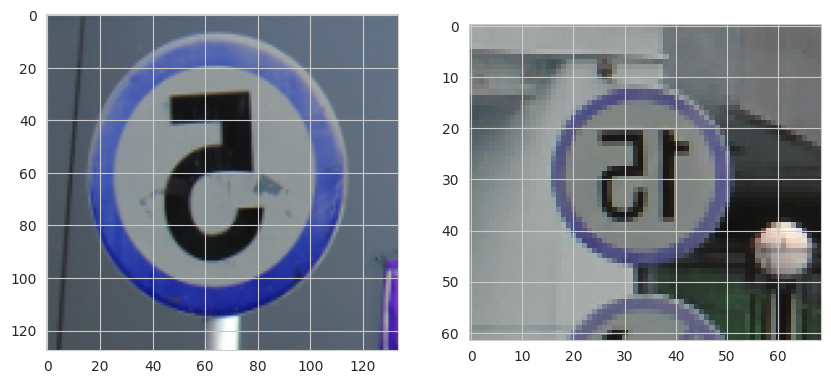

In [32]:
#horizontal flip
flip_img_1=cv2.flip(img_1,1) # horizontal flip
flip_img_2=cv2.flip(img_2,1) # horizontal flip

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(flip_img_1)
plt.subplot(122)
plt.imshow(flip_img_2)

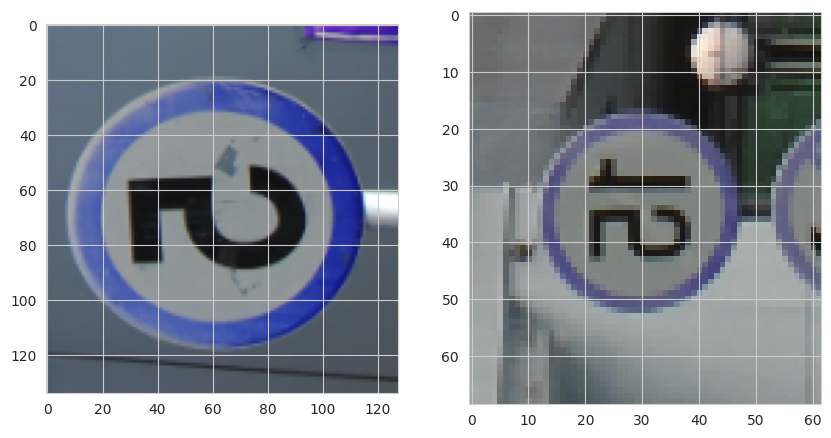

In [33]:
#transpose

transp_img_1=cv2.transpose(img_1,1) # transpose
transp_img_2=cv2.transpose(img_2,1) # transpose

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(transp_img_1)
plt.subplot(122)
plt.imshow(transp_img_2)

# Minimum, maximum
To find the min or max of a matrix, you can use minMaxLoc.
This takes a single channel image from each file
(it doesn't make much sense to take the max of a 3 channel image).
So in the next code snippet you see a for loop, using python style image slicing,
to look at each channel of the input image separately.


In [55]:

print("'5' speed limit sign image min/max values and co-ordinates")

for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img_1[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))

print("'5' speed limit sign image min/max values and co-ordinates")

for i in range(0,3):
   min_value, max_value, min_location, max_location=cv2.minMaxLoc(img_2[:,:,i])
   print("min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location))


'5' speed limit sign image min/max values and co-ordinates
min 15.0 is at (55, 78), and max 255.0 is at (63, 118)
min 16.0 is at (62, 47), and max 255.0 is at (62, 117)
min 15.0 is at (55, 78), and max 255.0 is at (64, 117)
'5' speed limit sign image min/max values and co-ordinates
min 16.0 is at (15, 39), and max 255.0 is at (5, 40)
min 16.0 is at (16, 39), and max 246.0 is at (6, 40)
min 14.0 is at (29, 23), and max 236.0 is at (5, 40)


# #Exracting Features in Visual Exploratory Data Analysis for visual model building
Features are image properties at locations that are used for computer based visual model development. Computer interprets the images based on these feature based Visual models. Some of the feature extraction techniques being attempted here are:
1. Making sense of images in presence of noise.
2. Extracting edges and Corners.
3. Understanding the impact of lighting and illumination artefacts.


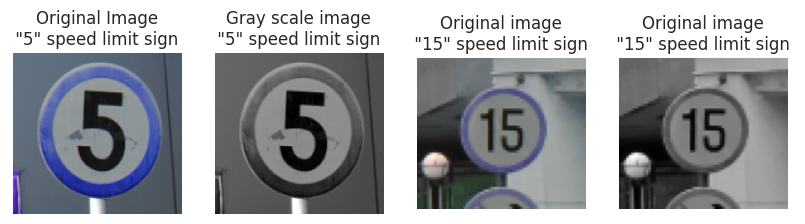

In [54]:
#Conversion to Gray scale image needed for pre-processing
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
%matplotlib inline


fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\n "5" speed limit sign ')
ax1.set_axis_off()

ax2.imshow(skic.rgb2gray(img_1), cmap ='gray')
ax2.set_title('Gray scale image\n "5" speed limit sign ')
ax2.set_axis_off()

ax3.imshow(img_2)
ax3.set_title('Original image\n "15" speed limit sign ')
ax3.set_axis_off()


ax4.imshow(skic.rgb2gray(img_2),cmap = 'gray')
ax4.set_title('Original image\n "15" speed limit sign ')
ax4.set_axis_off()




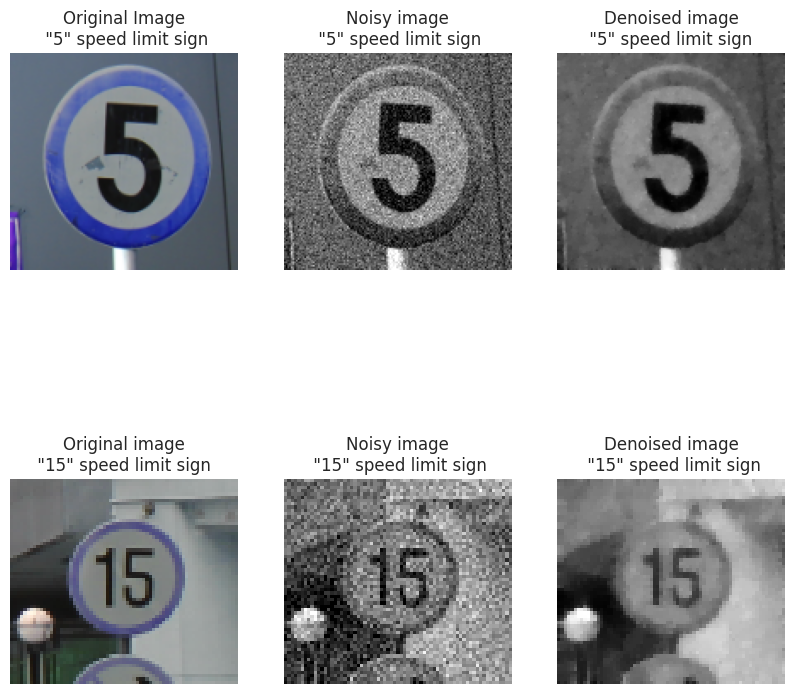

In [56]:
# We add Gaussian noise and denoise using denoise_tv_bregman approach
#for img_1 and img_2
img_1_n = sku.random_noise(skic.rgb2gray(img_1))
img_1_d = skimage.restoration.denoise_tv_bregman(img_1_n, 5.)

img_2_n = sku.random_noise(skic.rgb2gray(img_2))
img_2_d = skimage.restoration.denoise_tv_bregman(img_2_n, 5.)


fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(ncols=3,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\n "5" speed limit sign')
ax1.set_axis_off()

ax2.imshow(img_1_n, cmap ='gray')
ax2.set_title('Noisy image\n "5" speed limit sign')
ax2.set_axis_off()

ax3.imshow(img_1_d, cmap = 'gray')
ax3.set_title('Denoised image\n "5" speed limit sign ')
ax3.set_axis_off()

ax4.imshow(img_2)
ax4.set_title('Original image\n "15" speed limit sign ')
ax4.set_axis_off()

ax5.imshow(img_2_n, cmap ='gray')
ax5.set_title('Noisy image\n "15" speed limit sign')
ax5.set_axis_off()

ax6.imshow(img_2_d, cmap = 'gray')
ax6.set_title('Denoised image\n "15" speed limit sign')
ax6.set_axis_off()

# Noise reduction using Gaussian Blur
Noise reduction usually involves blurring/smoothing an image using a Gaussian kernel. The width of the kernel (d)  determines the amount of smoothing. Try with d=3 or d=6


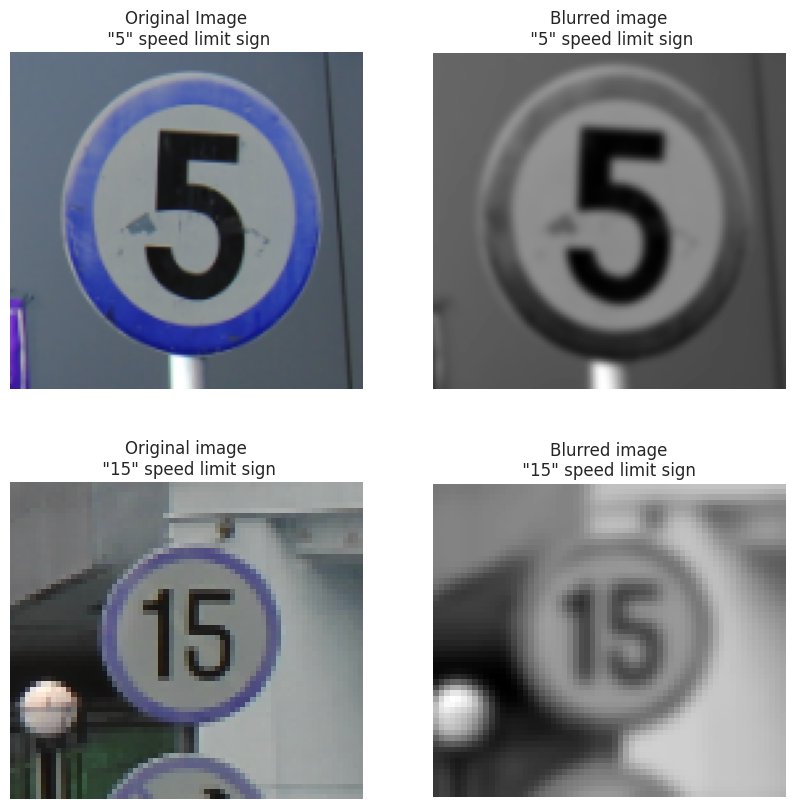

In [57]:
d=3
img_1_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_1), (2*d+1, 2*d+1), -1)[d:-d,d:-d]
img_2_blur3 = cv2.GaussianBlur(skic.rgb2gray(img_2), (2*d+1, 2*d+1), -1)[d:-d,d:-d]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(10, 10))

ax1.imshow(img_1)
ax1.set_title('Original Image\n "5" speed limit sign')
ax1.set_axis_off()

ax2.imshow(img_1_blur3, cmap ='gray')
ax2.set_title('Blurred image\n "5" speed limit sign')
ax2.set_axis_off()

ax3.imshow(img_2)
ax3.set_title('Original image\n "15" speed limit sign')
ax3.set_axis_off()

ax4.imshow(img_2_blur3, cmap = 'gray')
ax4.set_title('Blurred image\n "15" speed limit sign ')
ax4.set_axis_off()


# Edge detection
Edge is the final image processing technique for exploring the visual data.

Edge detection functions as a building block for building computer based detection models. Sobel's edge detector is one of the first truly successful edge detection (enhancement) technique and that involves convolution processing at its core.  

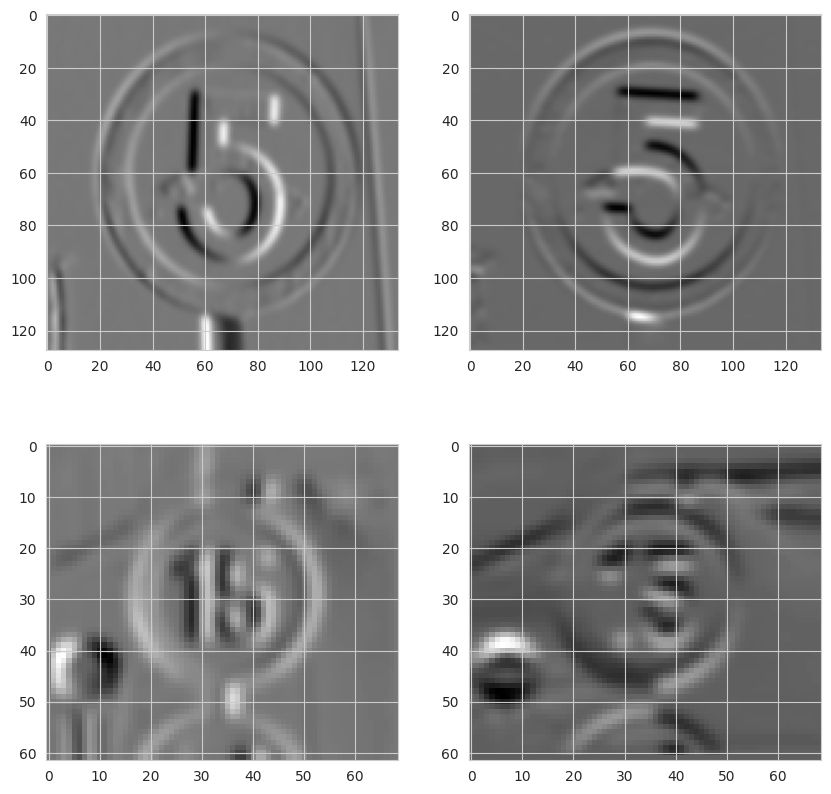

In [58]:
#Sobel edge detector
#edge detector works on gray scale images
sobel_img_1=cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY)
sobel_img_2=cv2.cvtColor(img_2,cv2.COLOR_BGR2GRAY)

sobelx_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,1,0,ksize=9)
sobely_img_1 = cv2.Sobel(sobel_img_1,cv2.CV_64F,0,1,ksize=9)

sobelx_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,1,0,ksize=9)
sobely_img_2 = cv2.Sobel(sobel_img_2,cv2.CV_64F,0,1,ksize=9)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(sobelx_img_1, cmap = 'gray')
plt.subplot(222)
plt.imshow(sobely_img_1, cmap = 'gray')
plt.subplot(223)
plt.imshow(sobelx_img_2, cmap = 'gray')
plt.subplot(224)
plt.imshow(sobely_img_2, cmap = 'gray')

# Canny edge detection
Canny edge detection is another winnning technique - it takes two thresholds. The first one determines how likely Canny is to find an edge, and the second determines how likely it is to follow that edge once it's found. Investigate the effect of these thresholds by altering the values below.

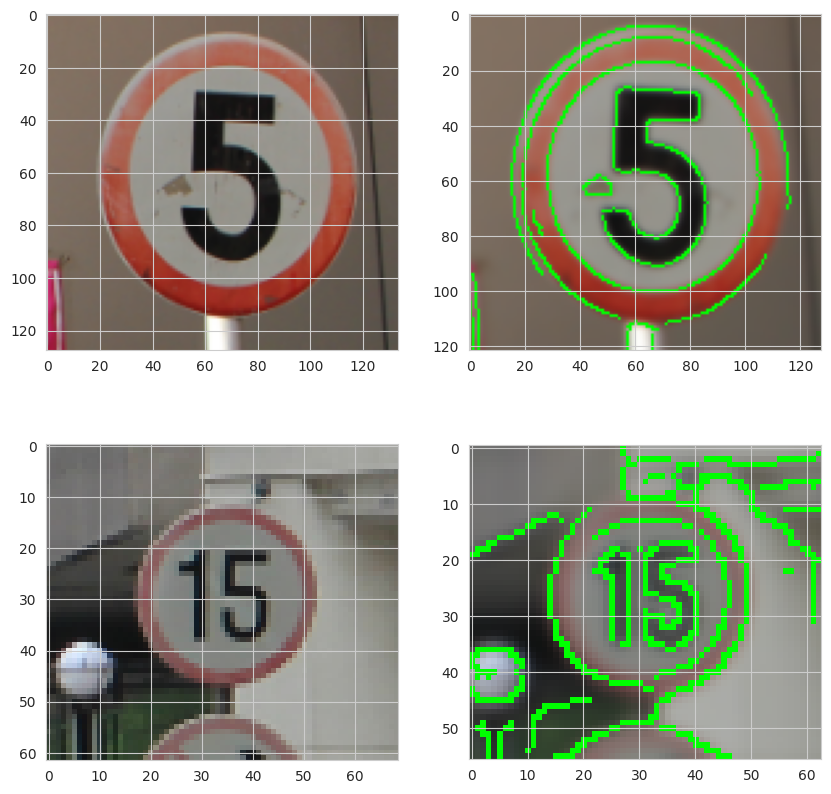

In [60]:
th1=30
th2=60
# Canny recommends threshold 2 is 3 times threshold 1
# you could try experimenting with this...
d=3
# gaussian blur
# this takes pixels in edgeresult where edge non-zero and colours them bright green

edgeresult_1=img_1.copy()
edgeresult_1 = cv2.GaussianBlur(edgeresult_1, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_1 = cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2GRAY)
edge_1 = cv2.Canny(gray_1, th1, th2)
edgeresult_1[edge_1 != 0] = (0, 255, 0)

edgeresult_2=img_2.copy()
edgeresult_2 = cv2.GaussianBlur(edgeresult_2, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray_2 = cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2GRAY)
edge_2 = cv2.Canny(gray_2, th1, th2)
edgeresult_2[edge_2 != 0] = (0, 255, 0)

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(cv2.cvtColor(edgeresult_1, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.subplot(224)
plt.imshow(cv2.cvtColor(edgeresult_2, cv2.COLOR_BGR2RGB))


# Corner detectors
If you think of edges as being lines, then corners are an obvious choice for features as they represent the intersection of two lines. One of the earlier corner detectors was introduced by Harris, and it is still a very effective corner detector that gets used quite a lot: it's reliable and it's fast. There's a tutorial explaining how Harris works on the OpenCV site here:
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html

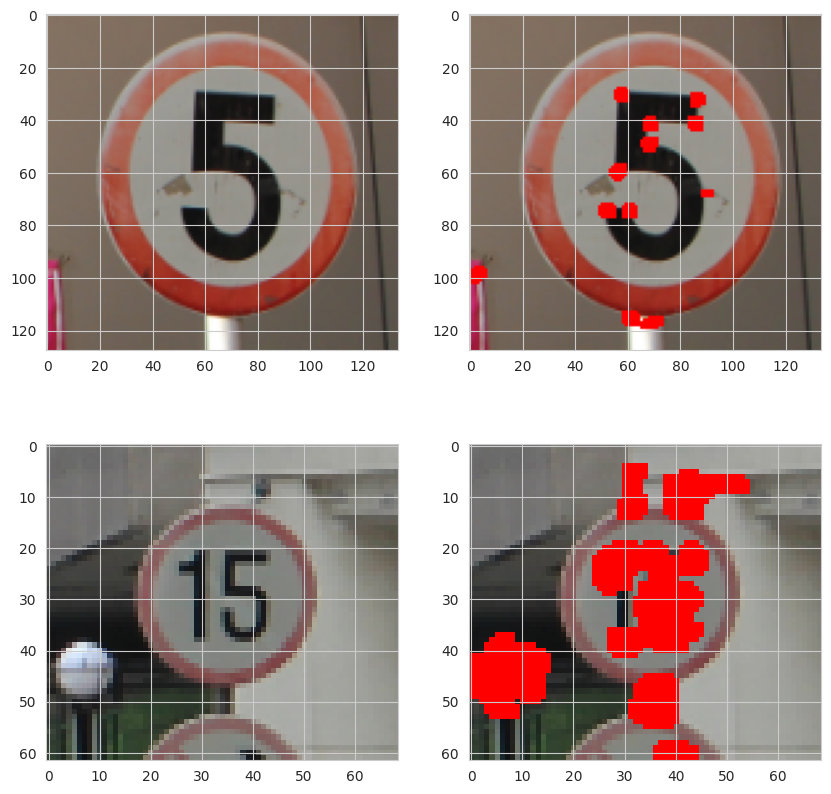

In [61]:
#detecting corners for  image_1
harris_1=img_1.copy()
#greyscale it
gray = cv2.cvtColor(harris_1,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_1[dst>0.01*dst.max()]=[0,0,255]

#detecting corners for image_2
harris_2=img_2.copy()
#greyscale it
gray = cv2.cvtColor(harris_2,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
blocksize=4 #
kernel_size=3 # sobel kernel: must be odd and fairly small
# run the harris corner detector
dst = cv2.cornerHarris(gray,blocksize,kernel_size,0.05) # parameters are blocksize, Sobel parameter and Harris threshold
#result is dilated for marking the corners, this is visualisation related and just makes them bigger
dst = cv2.dilate(dst,None)
#we then plot these on the input image for visualisation purposes, using bright red
harris_2[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(cv2.cvtColor(harris_1, cv2.COLOR_BGR2RGB))
plt.subplot(223)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.subplot(224)
plt.imshow(cv2.cvtColor(harris_2, cv2.COLOR_BGR2RGB))


# Understanding illumination and lighting artefacts by examining the camera effects/exposure of an image


In [62]:
import skimage.exposure as skie
%matplotlib inline

In [63]:
def show(img):
    # Display the image.
    fig, (ax1, ax2) = plt.subplots(1, 2,
                                   figsize=(12, 3))

    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.set_axis_off()

    # Display the histogram.
    ax2.hist(img.ravel(), lw=0, bins=256)
    ax2.set_xlim(0, img.max())
    ax2.set_yticks([])

    plt.show()

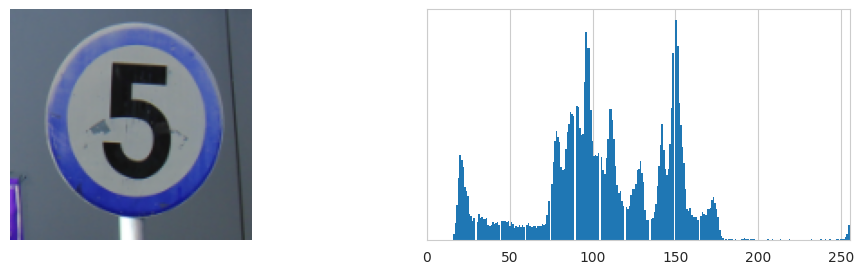

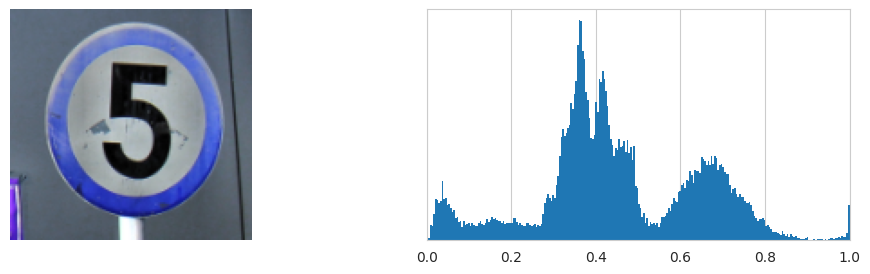

In [64]:
show(img_1)
show(skie.equalize_adapthist(img_1))

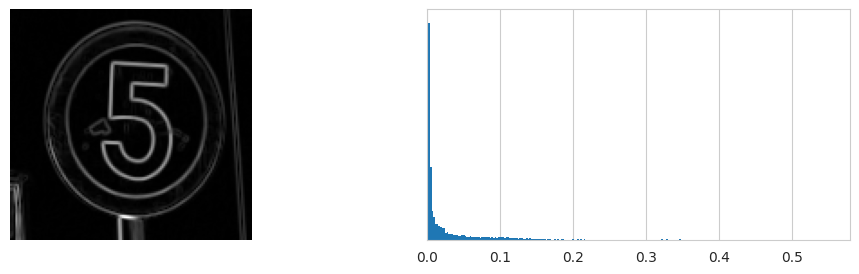

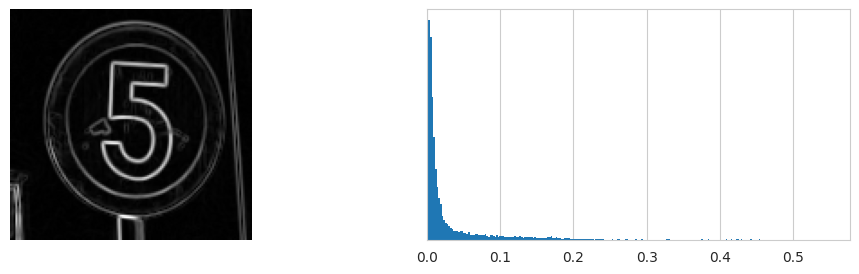

In [65]:
img = skic.rgb2gray(img_1)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_1))
sobimg_heq = skif.sobel(img)
show(sobimg_heq)

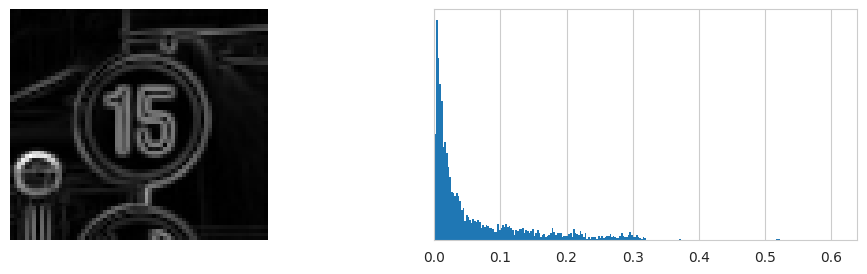

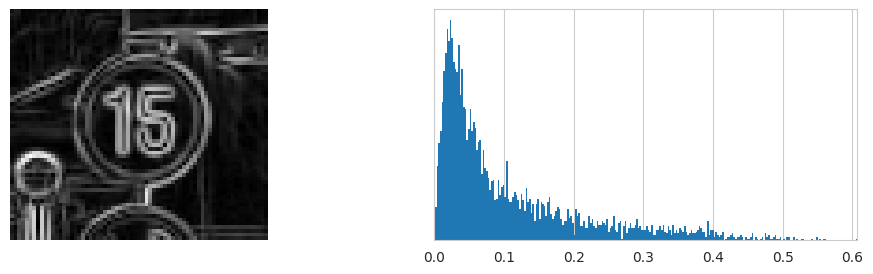

In [66]:
img = skic.rgb2gray(img_2)
sobimg_nheq= skif.sobel(img)
show(sobimg_nheq)
img = skic.rgb2gray(skie.equalize_adapthist(img_2))
sobimg_heq = skif.sobel(img)
show(sobimg_heq)